In [45]:
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install imbalanced-learn
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [47]:
df = pd.read_csv("good_customer.csv")

In [48]:
# Convert the 'type' column to numerical values using Label Encoding
label_encoder = LabelEncoder()
df["sex"] = label_encoder.fit_transform(df["sex"])
df["education"] = label_encoder.fit_transform(df["education"])
df["product_type"] = label_encoder.fit_transform(df["product_type"])
df["family_status"] = label_encoder.fit_transform(df["family_status"])

# Split the dataset into features and target
X = df.drop("bad_client_target", axis=1)
y = df["bad_client_target"]

# Handle missing values by filling them with the mean of each column
X = X.fillna(X.mean())

In [49]:
# Model initializations
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Naive Bayes": GaussianNB(),
}

# Levels of imbalance to be tested
imbalance_levels = [1500, 1200, 900, 600, 300]

# Define the undersampling techniques
# undersamplers = {
#     "Random UnderSampler": RandomUnderSampler(),
#     "Edited Nearest Neighbours": EditedNearestNeighbours(strategy='')
# }

In [50]:
# ...

# for sampler_name, sampler in undersamplers.items():
#     print(f"\n\nUsing {sampler_name}\n{'-'*50}")
accuracy_results = {name: [] for name in classifiers}
f1_score_results = {name: [] for name in classifiers}

for level in imbalance_levels:
    print(f"\n\nTesting for imbalance level: {level} samples\n{'-'*50}")

    # if sampler_name == "Random UnderSampler":
    strategy = {0: level}
    sampler = RandomUnderSampler(sampling_strategy=strategy)
    X_resampled, y_resampled = sampler.fit_resample(X, y)
    # elif sampler_name == "Edited Nearest Neighbours":
    #     sampler = EditedNearestNeighbours(sampling_strategy=strategy)
    #     X_resampled, y_resampled = sampler.fit_resample(X, y)

    # Split the resampled data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.3, random_state=10
    )

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        accuracy_results[name].append(accuracy)
        f1_score_results[name].append(f1)
        print(f"F1 Score for {name}: {f1:.4f}")
        print(f"Accuracy for {name}: {accuracy:.4f}")
        print(
            f"Classification Report for {name}:\n",
            classification_report(y_test, predictions),
        )
        print("-" * 50)



Testing for imbalance level: 1500 samples
--------------------------------------------------
F1 Score for Decision Tree: 0.2764
Accuracy for Decision Tree: 0.8251
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       446
           1       0.28      0.27      0.28        63

    accuracy                           0.83       509
   macro avg       0.59      0.59      0.59       509
weighted avg       0.82      0.83      0.82       509

--------------------------------------------------
F1 Score for SVM: 0.0000
Accuracy for SVM: 0.8762
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       446
           1       0.00      0.00      0.00        63

    accuracy                           0.88       509
   macro avg       0.44      0.50      0.47       509
weighted avg       0.77      0.88      0.82       509

------

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

F1 Score for SVM: 0.0000
Accuracy for SVM: 0.7964
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       262
           1       0.00      0.00      0.00        67

    accuracy                           0.80       329
   macro avg       0.40      0.50      0.44       329
weighted avg       0.63      0.80      0.71       329

--------------------------------------------------
F1 Score for Logistic Regression: 0.0290
Accuracy for Logistic Regression: 0.7964
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       262
           1       0.50      0.01      0.03        67

    accuracy                           0.80       329
   macro avg       0.65      0.51      0.46       329
weighted avg       0.74      0.80      0.71       329

--------------------------------------------------
F1 Score for Naive Bayes: 0.2745

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

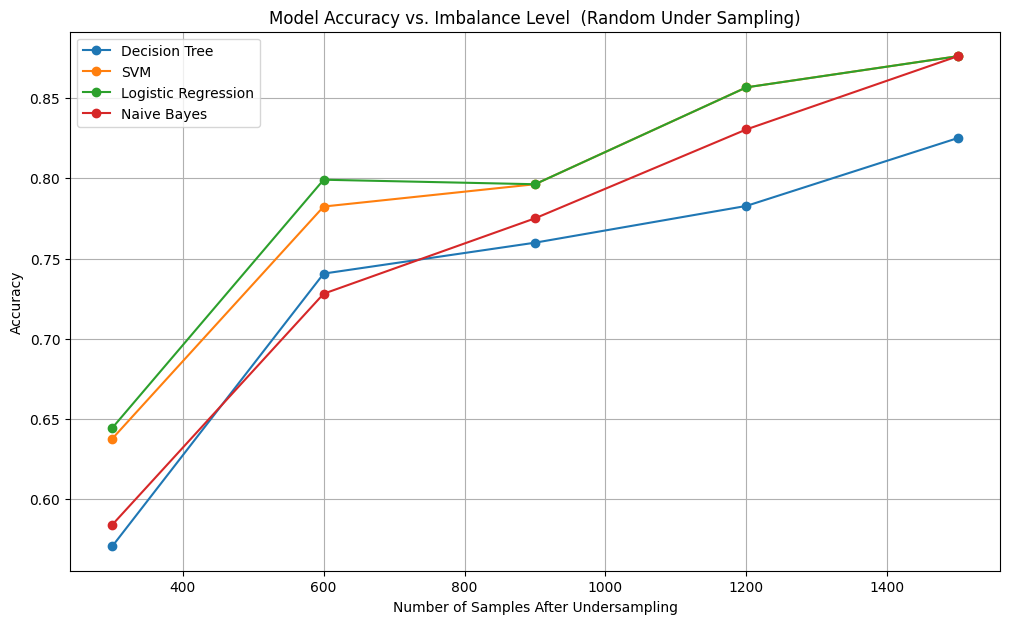

In [51]:
# Plotting the results for each undersampler
plt.figure(figsize=(12, 7))
for name, accuracies in accuracy_results.items():
    plt.plot(imbalance_levels, accuracies, label=name, marker="o")

plt.title(f"Model Accuracy vs. Imbalance Level  (Random Under Sampling)")
plt.xlabel("Number of Samples After Undersampling")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

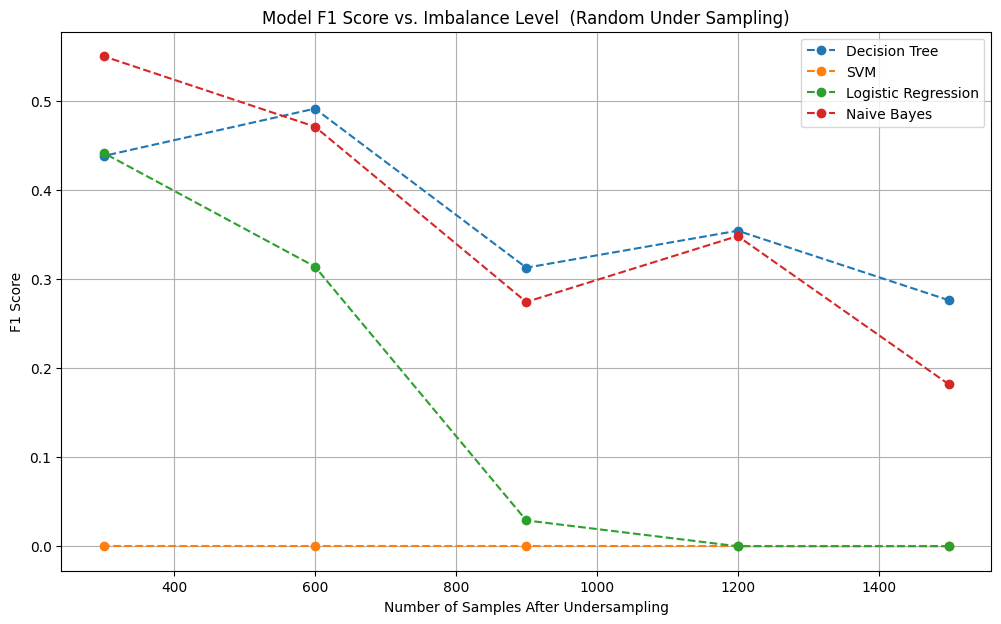

In [52]:
# Plotting the results for each undersampler
plt.figure(figsize=(12, 7))
for name, f1 in f1_score_results.items():
    plt.plot(imbalance_levels, f1, label=name, marker="o", linestyle="--")

plt.title(f"Model F1 Score vs. Imbalance Level  (Random Under Sampling)")
plt.xlabel("Number of Samples After Undersampling")
plt.ylabel("F1 Score")
plt.legend()
plt.grid(True)
plt.show()

In [53]:
# ...

# for sampler_name, sampler in undersamplers.items():
#     print(f"\n\nUsing {sampler_name}\n{'-'*50}")
accuracy_results = {name: [] for name in classifiers}
f1_score_results = {name: [] for name in classifiers}
strategies = [
    "all",
    "auto",
    "not minority",
    "majority" , 
    "not majority"
]

for strategy in strategies:
    print(f"\n\nTesting for imbalance level: {level} samples\n{'-'*50}")

    sampler = EditedNearestNeighbours(sampling_strategy=strategy)
    X_resampled, y_resampled = sampler.fit_resample(X, y)

    if len(np.unique(y_resampled)) < 2:
        print(f"Skipping strategy '{strategy}' as it results in one class")
        # Append placeholder values for skipped strategies
        for name in accuracy_results:
            accuracy_results[name].append(np.nan)
            f1_score_results[name].append(np.nan)
        continue

    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.3, random_state=10
    )

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        accuracy_results[name].append(accuracy)
        f1_score_results[name].append(f1)
        print(f"Accuracy for {name}: {accuracy:.4f}")
        print(
            f"Classification Report for {name}:\n",
            classification_report(y_test, predictions),
        )
        print("-" * 50)



Testing for imbalance level: 300 samples
--------------------------------------------------
Skipping strategy 'all' as it results in one class


Testing for imbalance level: 300 samples
--------------------------------------------------
Accuracy for Decision Tree: 0.7734
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86       324
           1       0.31      0.37      0.34        60

    accuracy                           0.77       384
   macro avg       0.59      0.61      0.60       384
weighted avg       0.79      0.77      0.78       384

--------------------------------------------------
Accuracy for SVM: 0.8438
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.84      1.00      0.92       324
           1       0.00      0.00      0.00        60

    accuracy                           0.84       384
   macro avg       0.42      0.

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Accuracy for Naive Bayes: 0.8099
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       324
           1       0.38      0.33      0.35        60

    accuracy                           0.81       384
   macro avg       0.63      0.62      0.62       384
weighted avg       0.80      0.81      0.81       384

--------------------------------------------------


Testing for imbalance level: 300 samples
--------------------------------------------------
Accuracy for Decision Tree: 0.7578
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       324
           1       0.29      0.37      0.32        60

    accuracy                           0.76       384
   macro avg       0.58      0.60      0.59       384
weighted avg       0.78      0.76      0.77       384

--------------------------------------------------


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

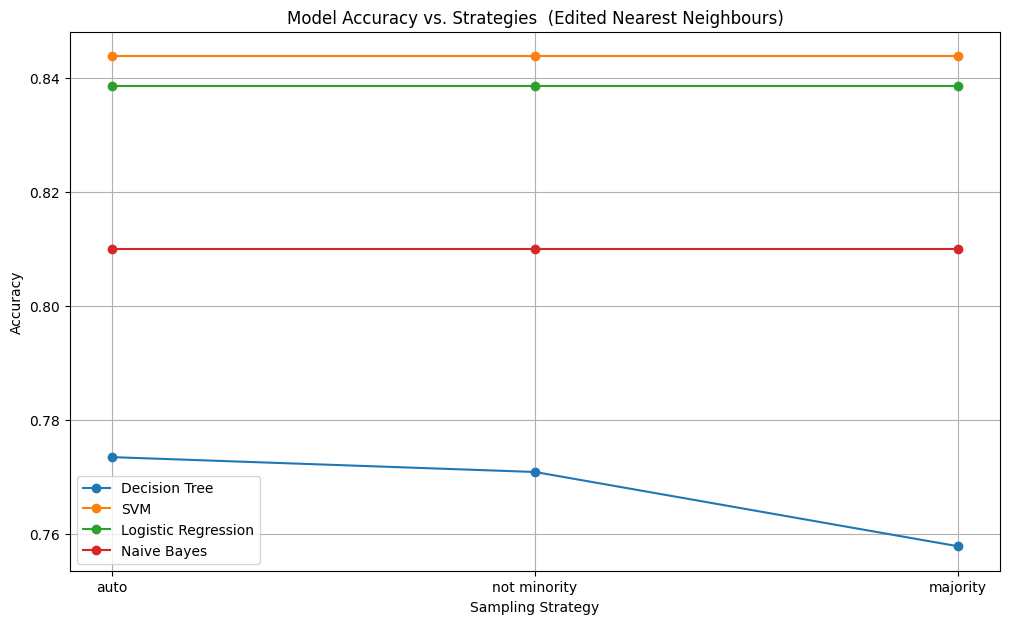

In [54]:
# Plotting the results for each undersampler
plt.figure(figsize=(12, 7))
for name, accuracies in accuracy_results.items():
    plt.plot(strategies, accuracies, label=name, marker="o")

# plt.title(f"Model Accuracy vs. Imbalance Level ({sampler_name})")
plt.title(f"Model Accuracy vs. Strategies  (Edited Nearest Neighbours)")
plt.xlabel("Sampling Strategy")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

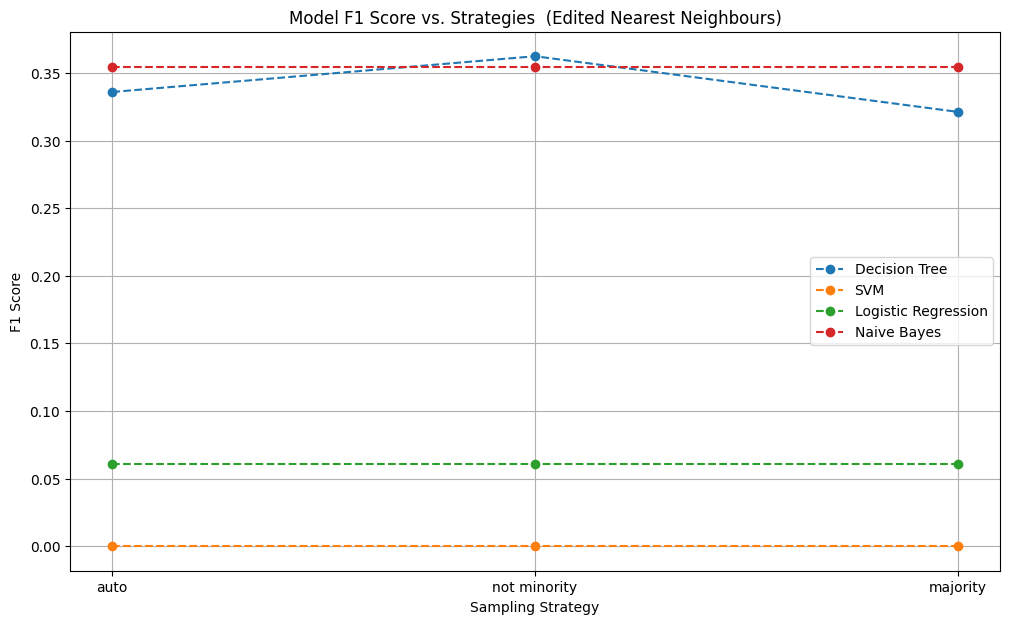

In [55]:
# Plotting the results for each undersampler
plt.figure(figsize=(12, 7))
for name, f1 in f1_score_results.items():
    plt.plot(strategies, f1, label=name, marker="o", linestyle="--")

# plt.title(f"Model Accuracy vs. Imbalance Level ({sampler_name})")
plt.title(f"Model F1 Score vs. Strategies  (Edited Nearest Neighbours)")
plt.xlabel("Sampling Strategy")
plt.ylabel("F1 Score")
plt.legend()
plt.grid(True)
plt.show()